In [11]:
import scanpy as sc
import scvi
import warnings
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
sc.set_figure_params(figsize=(4, 4))
import numpy as np
import torch
import anndata
%matplotlib inline  
import sys
sys.path.append('..')
from functions import *

In [12]:
adata = anndata.read_h5ad(filename="../data/adataLung4.h5ad")

In [13]:
adataSN, vaeSN = trainModel(adata,"sdnormal", save="models/PPV_StandardNormal",n_latent=2)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:31<00:00,  2.02s/it, v_num=1, train_loss_step=972, train_loss_epoch=900]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:31<00:00,  2.03s/it, v_num=1, train_loss_step=972, train_loss_epoch=900]


In [14]:
adataMG, vaeMG = trainModel(adata,"mixofgaus", save="models/PPV_MixtureOfGaussians",n_latent=2)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

Epoch 400/400: 100%|██████████| 400/400 [13:01<00:00,  1.89s/it, v_num=1, train_loss_step=919, train_loss_epoch=901]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:01<00:00,  1.95s/it, v_num=1, train_loss_step=919, train_loss_epoch=901]


In [15]:
adataVP, vaeVP = trainModel(adata,"vamp", save="models/PPV_Vamp",n_latent=2)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [21:44<00:00,  4.25s/it, v_num=1, train_loss_step=915, train_loss_epoch=900]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [21:44<00:00,  3.26s/it, v_num=1, train_loss_step=915, train_loss_epoch=900]


In [16]:
adataNF, vaeNF = trainModel(adata,"normalflow", save="models/PPV_NormalFlow",n_latent=2)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [42:43<00:00,  6.46s/it, v_num=1, train_loss_step=1.03e+3, train_loss_epoch=901]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [42:43<00:00,  6.41s/it, v_num=1, train_loss_step=1.03e+3, train_loss_epoch=901]


In [17]:
vaeSN = scvi.model.SCVI.load("models/PPV_StandardNormal")
vaeMG = scvi.model.SCVI.load("models/PPV_MixtureOfGaussians")
vaeVP = scvi.model.SCVI.load("models/PPV_Vamp")
vaeNF = scvi.model.SCVI.load("models/PPV_NormalFlow")

INFO     File models/PPV_StandardNormal/model.pt already downloaded                                                
INFO     File models/PPV_MixtureOfGaussians/model.pt already downloaded                                            
INFO     File models/PPV_Vamp/model.pt already downloaded                                                          
INFO     File models/PPV_NormalFlow/model.pt already downloaded                                                    


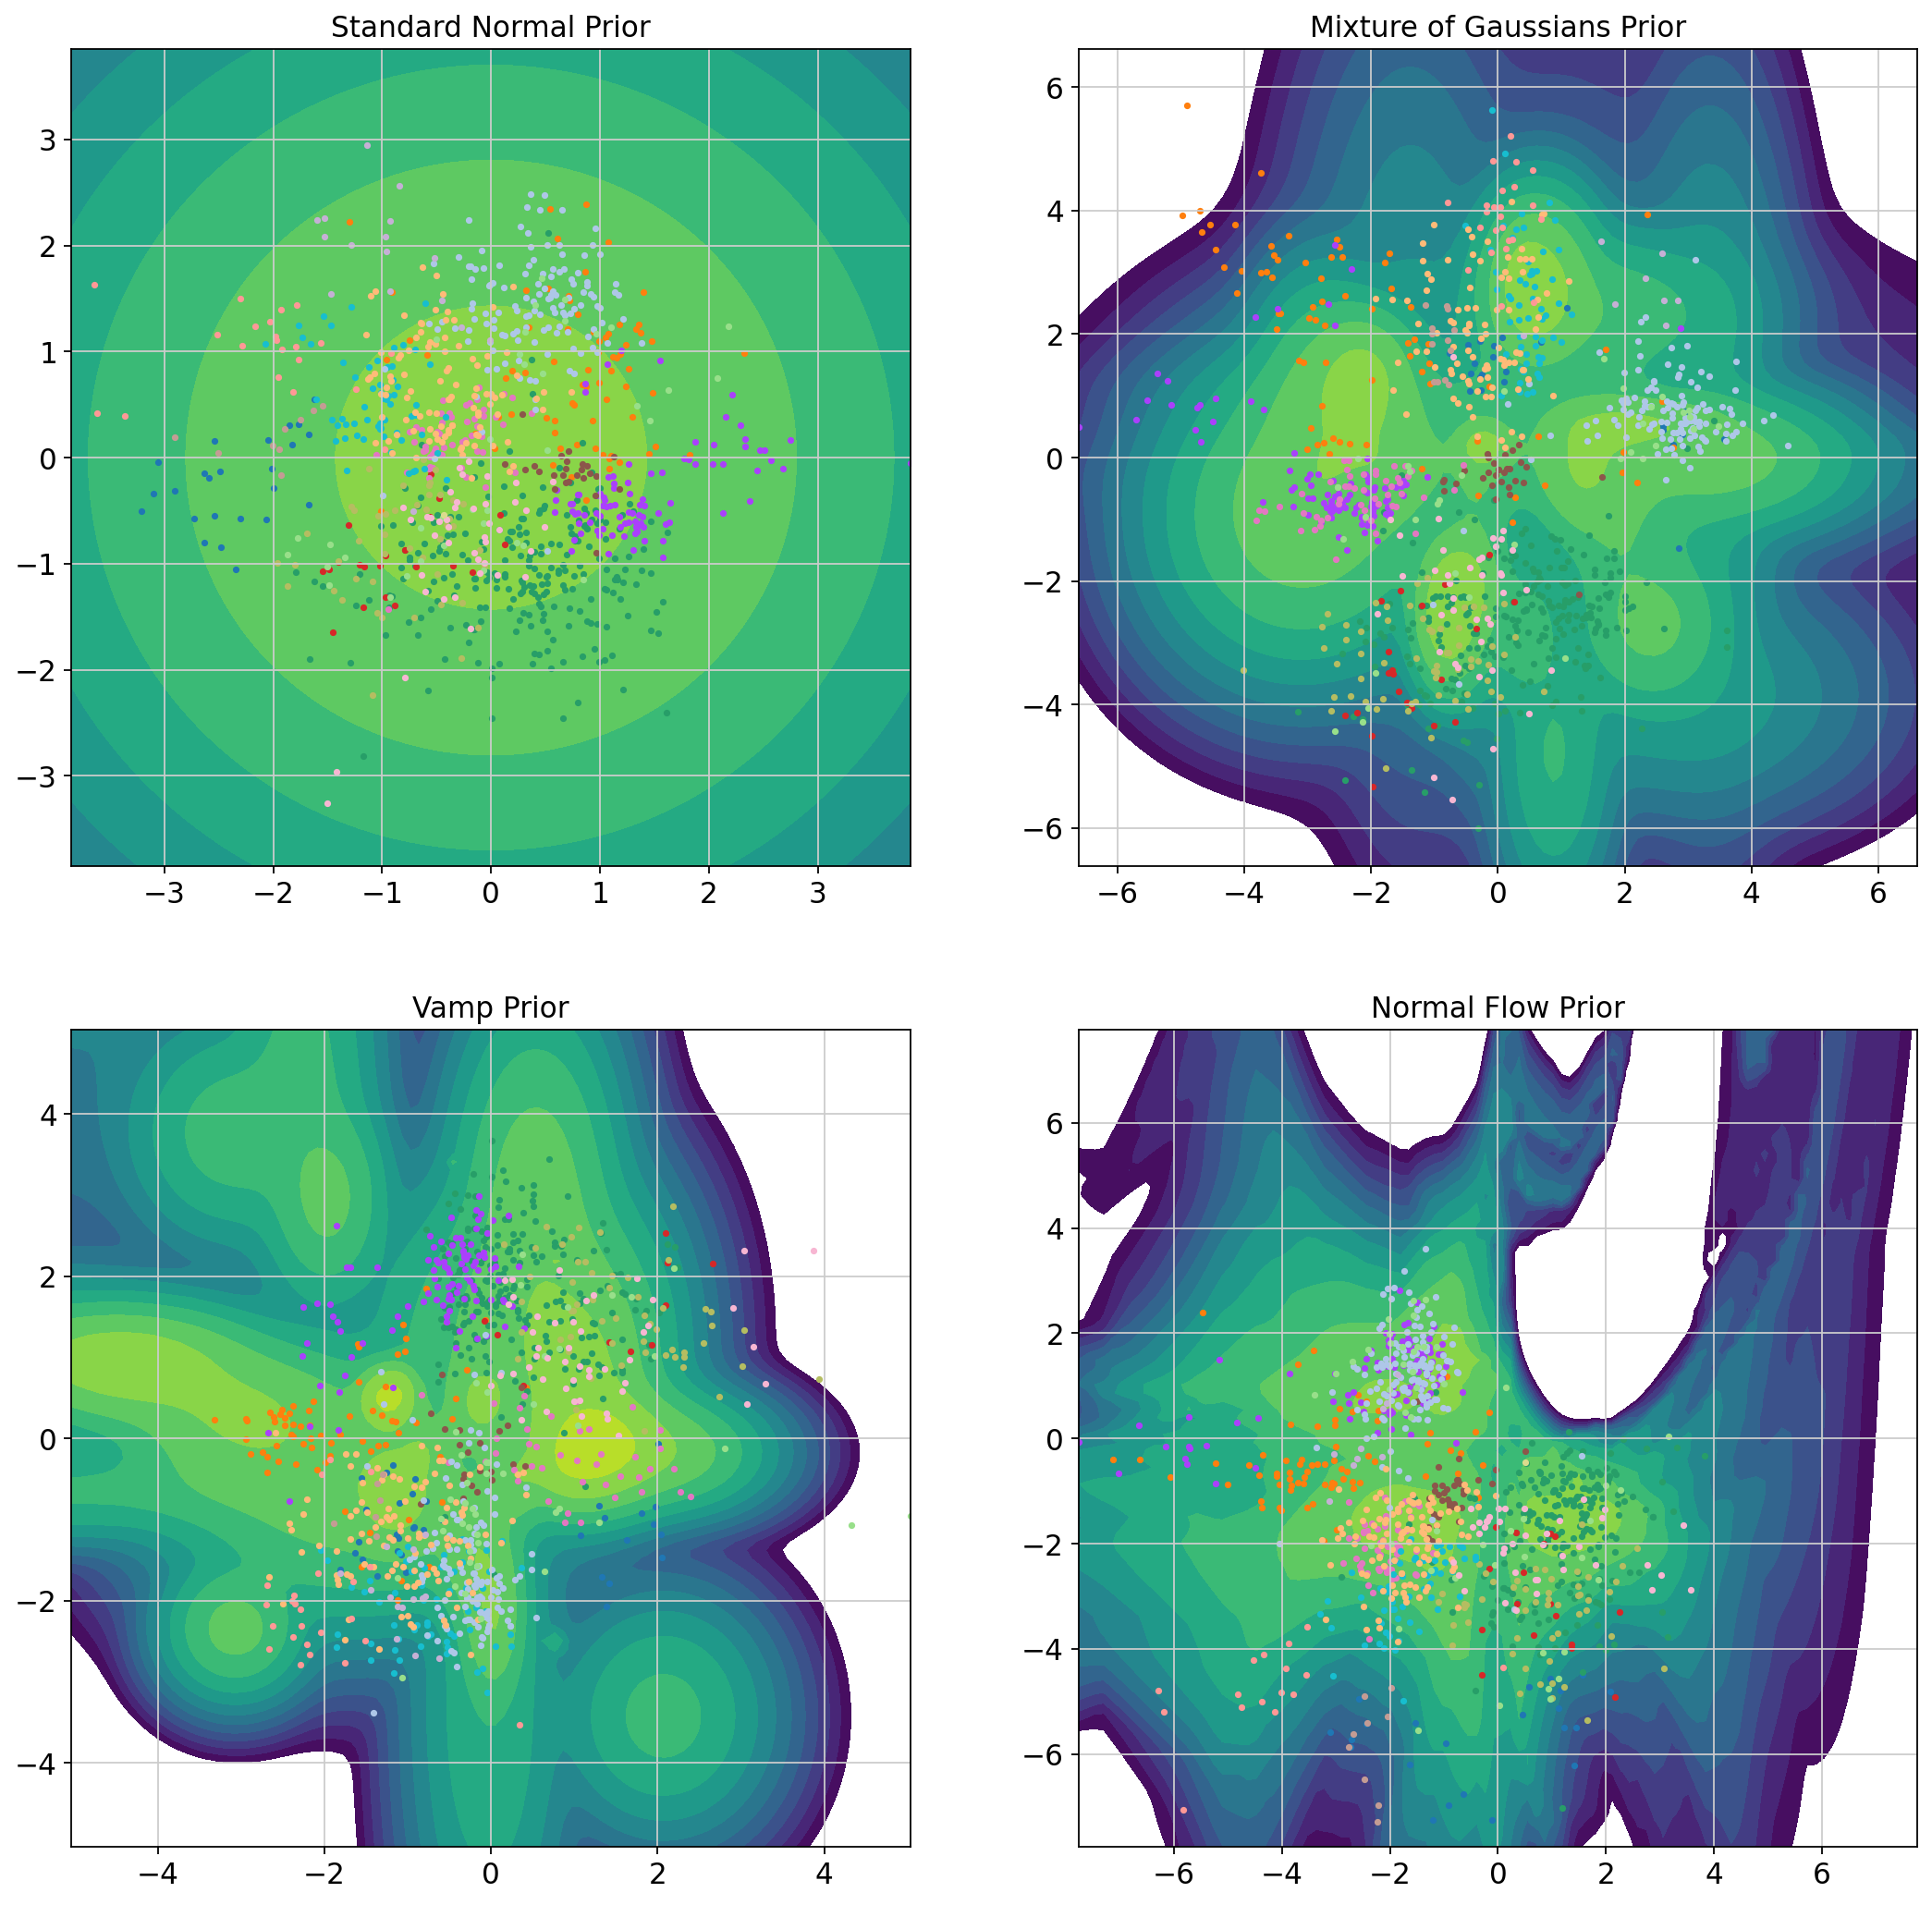

In [18]:
posteriorVisualizationAll(adata, vaeSN, vaeMG, vaeVP, vaeNF)

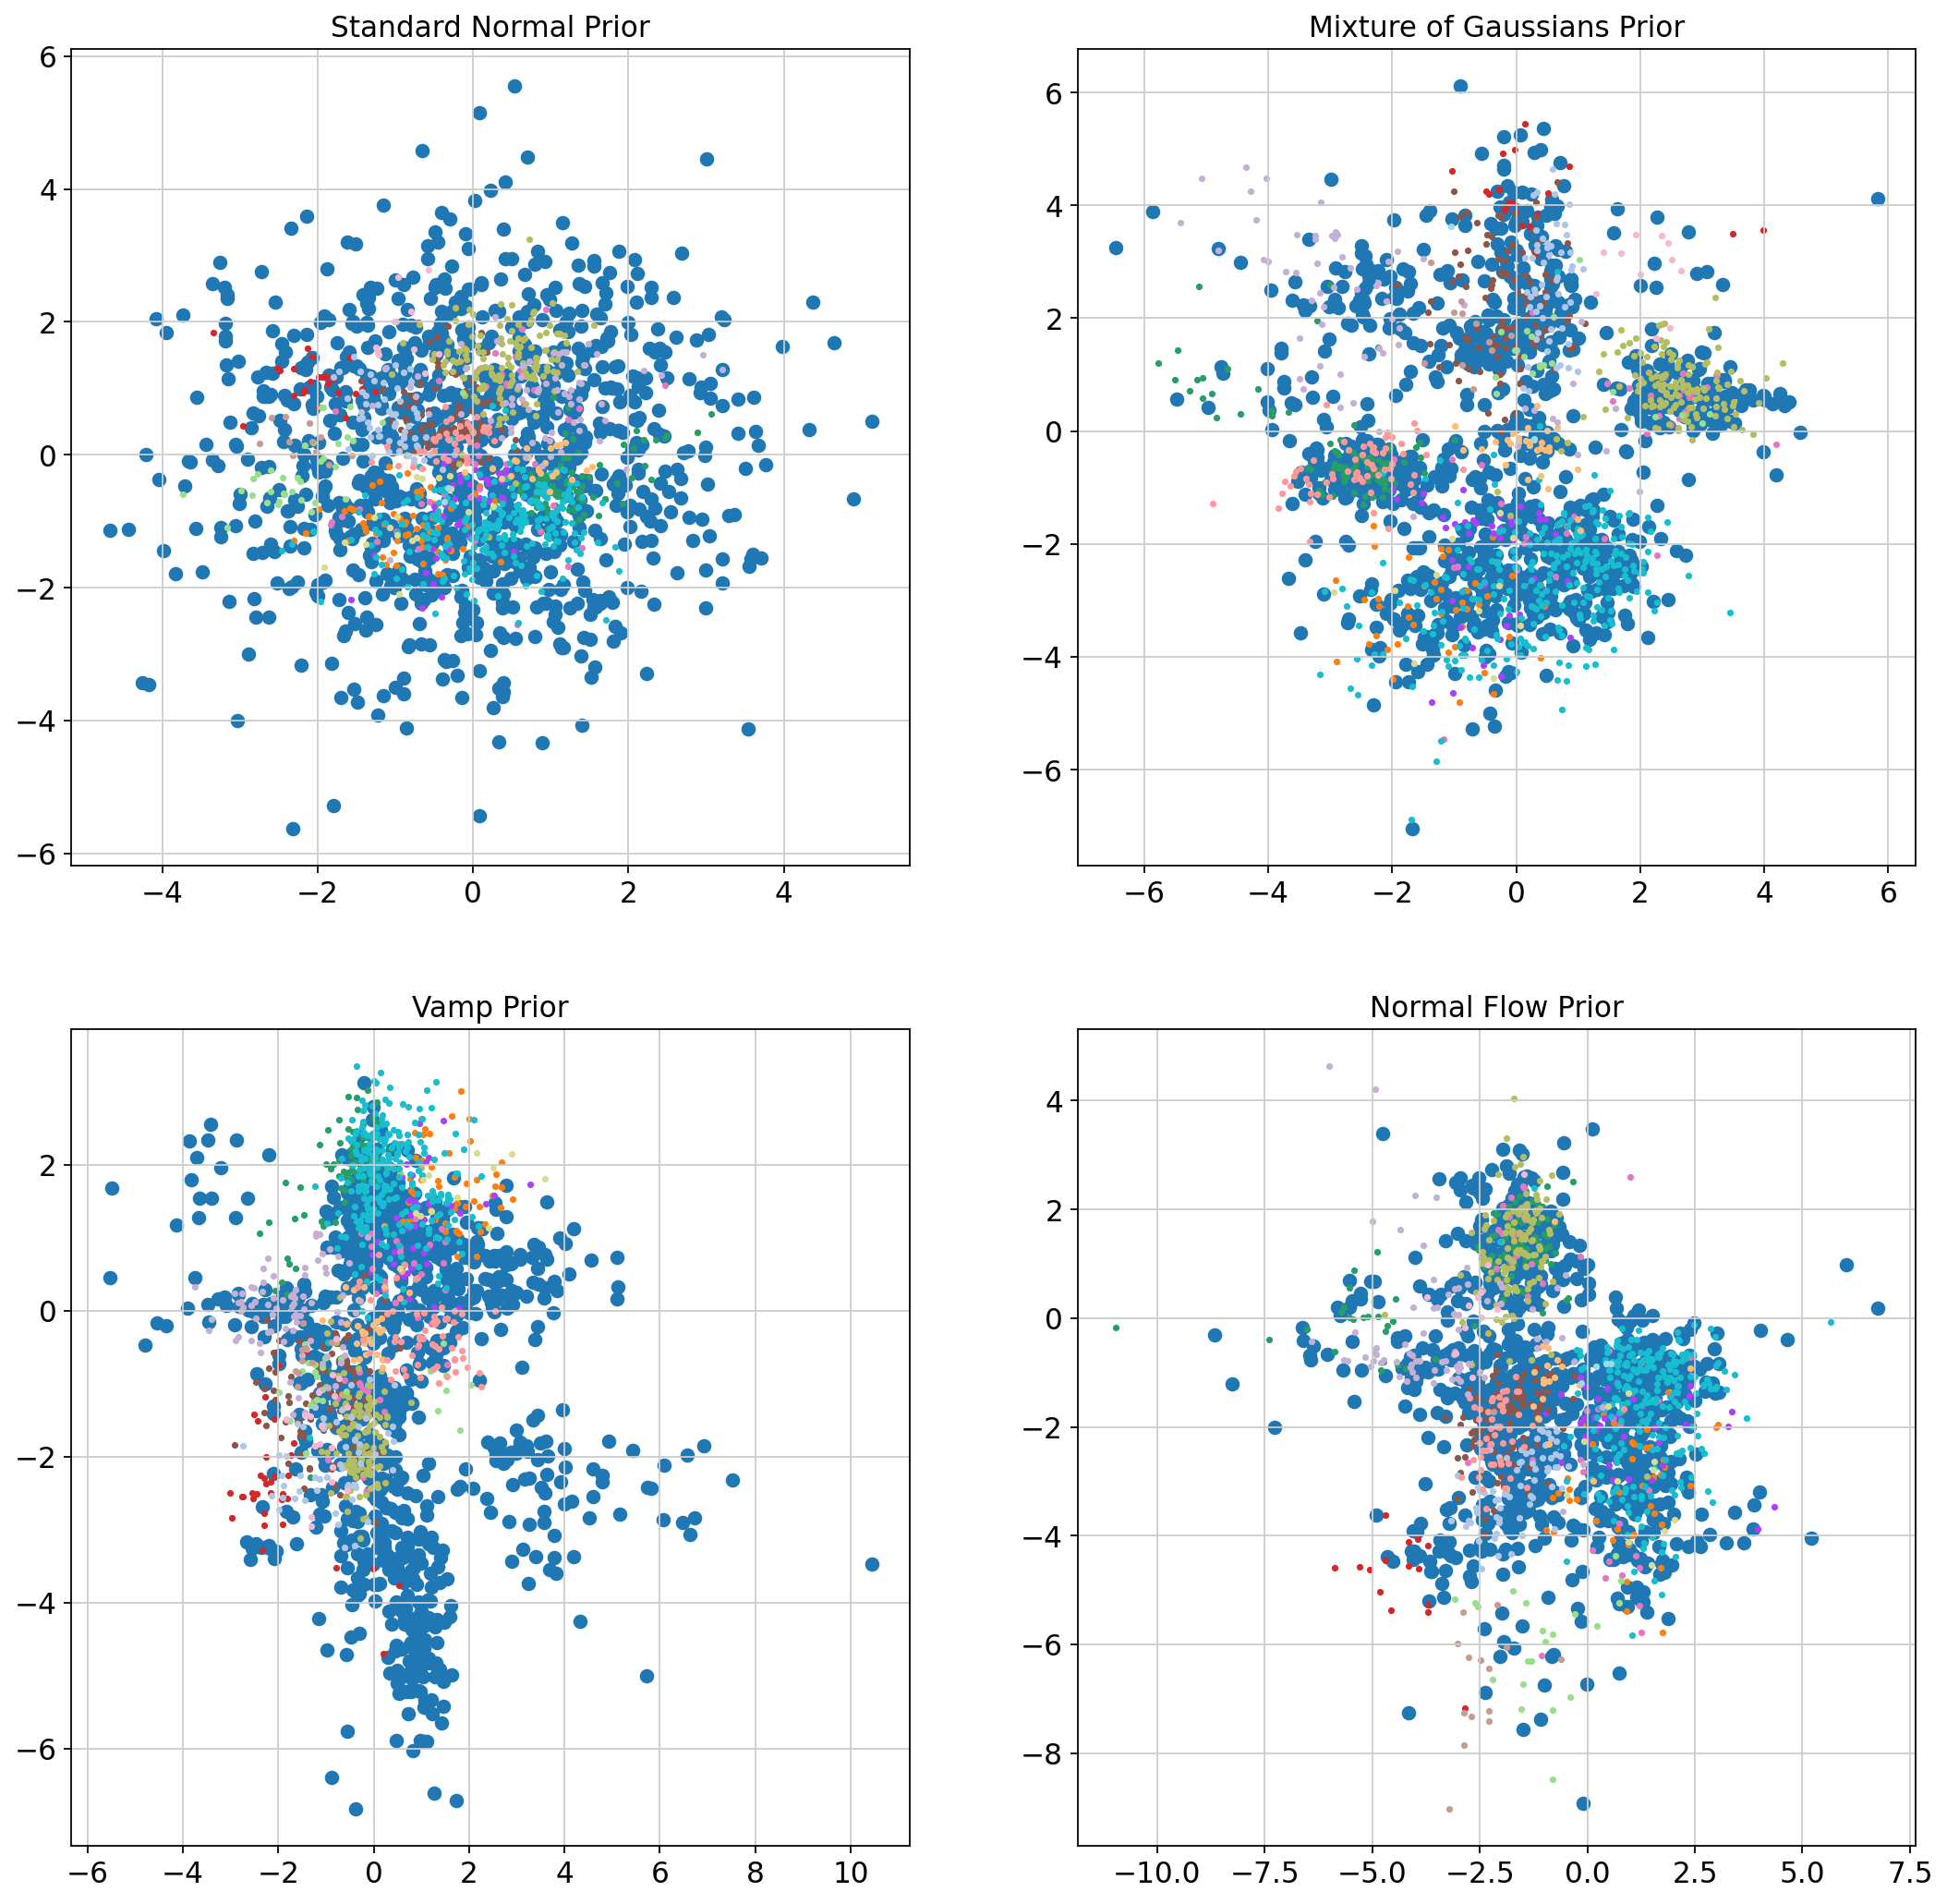

In [19]:
posteriorVisualizationAll(adata, vaeSN, vaeMG, vaeVP, vaeNF, True)